<h1 align="center">Handwritten Digit Predictor</h1>







### Import Keras and Packages


Let's start by importing the keras libraries and the packages that we would need to build a neural network.


In [1]:
#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6
#!pip install scikit-learn==1.0

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [5]:
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

<a id='item42'></a>


### Import data

In [6]:
from keras.datasets import mnist

### Load data

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Let's normalize the pixel values to be between 0 and 1


In [8]:
X_train = X_train / 255
X_test = X_test / 255

Next, let's convert the target variable into binary categories


In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

### Create the model

In [10]:
def convolutional_model():
    
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [11]:
# build the model
model = convolutional_model()

### Train the model

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


2024-07-27 18:11:00.246481: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-07-27 18:11:00.258769: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394320000 Hz
2024-07-27 18:11:00.259432: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b935fd87a0 executing computations on platform Host. Devices:
2024-07-27 18:11:00.259521: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-07-27 18:11:00.412014: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

 - 43s - loss: 0.5236 - acc: 0.8523 - val_loss: 0.1632 - val_acc: 0.9525
Epoch 2/10
 - 41s - loss: 0.1337 - acc: 0.9599 - val_loss: 0.0998 - val_acc: 0.9693
Epoch 3/10
 - 41s - loss: 0.0939 - acc: 0.9710 - val_loss: 0.0745 - val_acc: 0.9776
Epoch 4/10
 - 39s - loss: 0.0738 - acc: 0.9773 - val_loss: 0.0634 - val_acc: 0.9804
Epoch 5/10
 - 41s - loss: 0.0629 - acc: 0.9801 - val_loss: 0.0521 - val_acc: 0.9833
Epoch 6/10
 - 39s - loss: 0.0545 - acc: 0.9826 - val_loss: 0.0527 - val_acc: 0.9822
Epoch 7/10
 - 41s - loss: 0.0484 - acc: 0.9853 - val_loss: 0.0423 - val_acc: 0.9857
Epoch 8/10
 - 41s - loss: 0.0434 - acc: 0.9863 - val_loss: 0.0450 - val_acc: 0.9858
Epoch 9/10
 - 40s - loss: 0.0396 - acc: 0.9874 - val_loss: 0.0378 - val_acc: 0.9888
Epoch 10/10
 - 41s - loss: 0.0360 - acc: 0.9886 - val_loss: 0.0408 - val_acc: 0.9861


### Evaluate the model

#### Predictions made by the model

In [13]:
y_hat=model.predict(X_test)

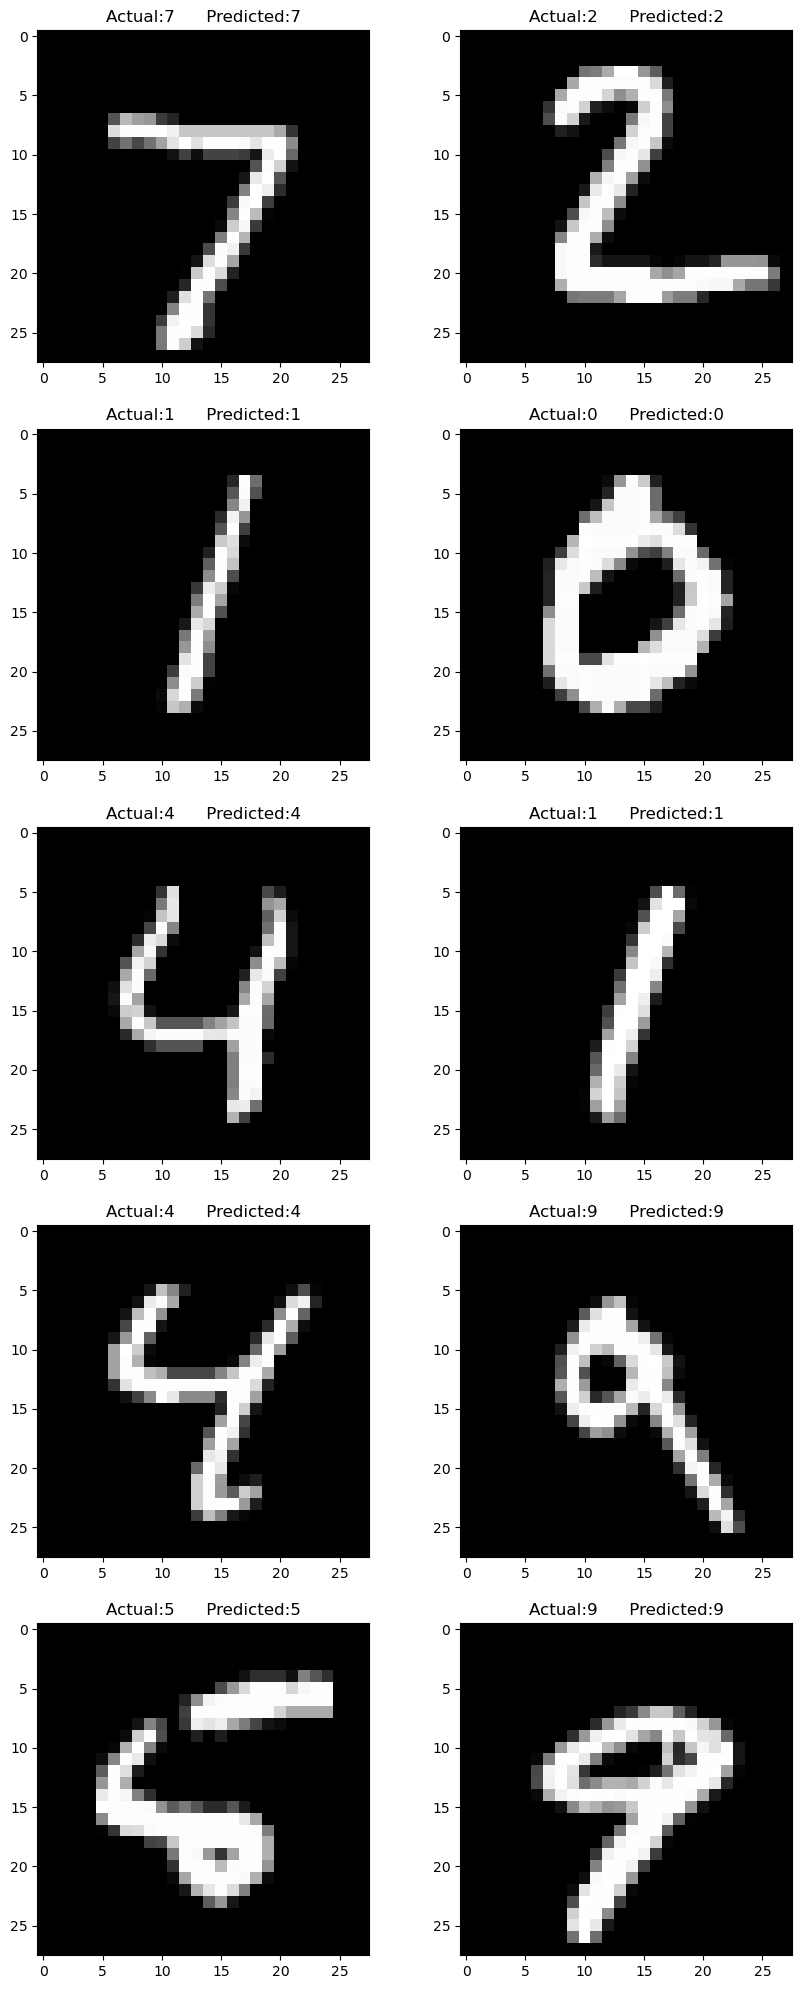

In [14]:
plt.figure(figsize=(10,25))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.title(f'Actual:{y_test[i].argmax()}      Predicted:{y_hat[i].argmax()}')
plt.show()

#### Performance of the model

In [15]:
cnf_matrix=metrics.confusion_matrix(y_test.argmax(axis=1),y_hat.argmax(axis=1))

<Figure size 640x480 with 0 Axes>

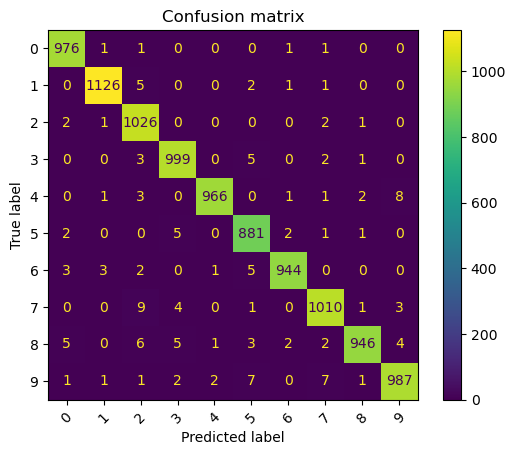

In [16]:
plt.figure()
disp=metrics.ConfusionMatrixDisplay(cnf_matrix)
disp.plot()
plt.title('Confusion matrix')
plt.xticks(rotation=45)
plt.show()

In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 1-scores[1]))

Accuracy: 0.9861 
 Error: 0.013900000000000023
